In [11]:
import pandas as pd
import json
import re

In [31]:
with open('./mDiffFit-test.json') as single_workflow:
    data = json.load(single_workflow)

In [38]:
results = []
for the_iteration in [1,10,20,50,70,120,150,200,250,300,500,1000]:
    for task in data['256']:
        new_result = {}
        start_time = int(re.search("lambda start: ([0-9]*) ", task['result']).group(1))
        end_time = int(re.search("lambda end: ([0-9]*) ", task['result']).group(1))
        iteration = task['iteration'].split("_")[0]
        if iteration == str(the_iteration):
            lambda_time = end_time - start_time
            new_result['time'] = lambda_time
            new_result['iteration'] = iteration

            results.append(new_result)

In [39]:
df = pd.DataFrame(results)

In [40]:
df.groupby('iteration').mean()

,time
iteration,
1,1583.755000
10,1861.420000
1000,1660.961000
120,1602.591667
150,1559.931111
20,1906.645000
200,1647.368333
250,1567.720000
300,1874.035556


In [35]:
df.iteration = df.iteration.astype(str)

AttributeError: 'DataFrame' object has no attribute 'iteration'

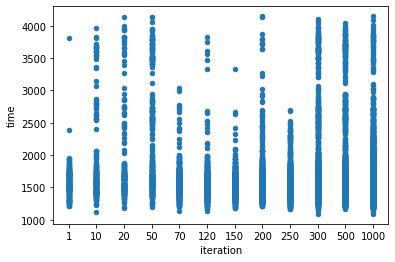

In [41]:
df.plot.scatter(x='iteration',
                      y='time')